# Let's Cluster!
- Let's practice kmeans and hierarchical clustering
- Let's visualize our clusters

In [1]:
from sklearn import datasets

import pandas as pd

In [2]:
iris = datasets.load_iris()

In [5]:
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

Convert X (which is a numpy array) into a dataframe.

In [11]:
features = pd.DataFrame(data=X)

In [13]:
from sklearn.cluster import KMeans

In [14]:
clusterer = KMeans(n_clusters=5)

In [15]:
clusterer.fit(features)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [20]:
clusterer.cluster_centers_

array([[5.19677419, 3.63870968],
       [5.85777778, 2.71333333],
       [7.475     , 3.125     ],
       [4.772     , 2.9       ],
       [6.56216216, 3.05945946]])

In [21]:
clusterer.labels_

array([0, 3, 3, 3, 0, 0, 3, 0, 3, 3, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 3, 0, 0, 0, 3, 3, 0, 0, 0, 3, 3, 0, 3, 3, 0, 0, 3, 3, 0,
       0, 3, 0, 3, 0, 0, 4, 4, 4, 1, 4, 1, 4, 3, 4, 3, 3, 1, 1, 1, 1, 4,
       1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 4, 4, 1,
       1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 4, 1, 2, 4, 4, 2, 3, 2, 4, 2,
       4, 4, 4, 1, 1, 4, 4, 2, 2, 1, 4, 1, 2, 1, 4, 2, 1, 1, 4, 2, 2, 2,
       4, 4, 1, 2, 4, 4, 1, 4, 4, 4, 1, 4, 4, 4, 1, 4, 4, 1], dtype=int32)

In [22]:
clusterer.inertia_

20.97661980044561

In [23]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Analysis of K
- Choose different `n_clusters`, say from 1 to 100
- Run kMeans
- Do a line graph of K vs inertia

In [30]:
# k_choices = 
# inertias = []

# for k in k_choices:
#     inertias.append(KMeans(n_clusters=k).fit(features).inertia_)
    
data = [
    {
    "k": k,
    "inertia": KMeans(n_clusters=k).fit(features).inertia_
    } 
   for k in list(range(1, 6))
]

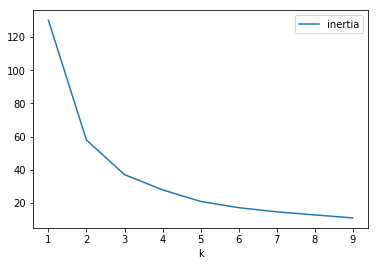

In [29]:
pd.DataFrame(data).plot(x='k', y='inertia', kind='line')

In [32]:
cluster = KMeans(n_clusters=3)
cluster.fit(features)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [33]:
from matplotlib import pyplot as plt

In [35]:
## What was `features?`
# X = iris.data[:, :2]  # we only take the first two features.
# features = pd.DataFrame(data=X)

df = features.copy()

In [37]:
df['cluster'] = cluster.labels_

## Mini exercise
Create 3 lists

- cluster_0
- cluster_1 
- cluster_2

The first 2 columns of `df` for each cluster, so cluster_0 would be the first two columns wherever cluster = 0.


In [41]:
cluster_0 = df[df['cluster'] == 0][[0, 1]]
cluster_1 = df[df['cluster'] == 1][[0, 1]]
cluster_2 = df[df['cluster'] == 2][[0, 1]]

In [42]:
centers = cluster.cluster_centers_

In [50]:
centers

array([[5.006     , 3.418     ],
       [6.81276596, 3.07446809],
       [5.77358491, 2.69245283]])

In [44]:
from matplotlib import pyplot as plt

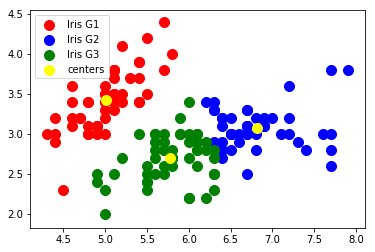

In [51]:
plt.scatter(cluster_0[0], cluster_0[1], s=100, c='red', label='Iris G1')
plt.scatter(cluster_1[0], cluster_1[1], s=100, c='blue', label='Iris G2')
plt.scatter(cluster_2[0], cluster_2[1], s=100, c='green', label='Iris G3')
plt.scatter(centers[:, 0], centers[:, 1], s=100, c='yellow', label='centers')
plt.legend()

## Clustering practice
1. Read in the breast cancer dataset
2. Don't consider the label (M,B)
3. Remove the id (which is the 0th column)
4. Run Kmeans and pick the best K (graph it)
5. Pick 2 of the features and create a plot 
6. **BONUS** Compare your cluster labels.... class labels (M/B)

https://s3-us-west-2.amazonaws.com/ga-dat-2015-suneel/datasets/breast-cancer.csv

In [52]:
df = pd.read_csv(
    "https://s3-us-west-2.amazonaws.com/ga-dat-2015-suneel/datasets/breast-cancer.csv",
    header=None
)

In [53]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Practice Hierarchical Approach
- Use `AgglomerativeClustering` from sklearn to come up with cluster labels for this dataset. Choose n_clusters =2.
- Compare the cluster labels between Agglomerative vs K means. 
- How does hierarchical results match up against our M and B labels

## LUNCH BREAK
Back at 1:10pm

# Multiple Attempts at Classification
Let's work on a new data set and go through together how we would actually hack on the data set and build and tune some models.

In [55]:
df = pd.read_csv(
    "http://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data",
    header=None
)

In [56]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [58]:
df[df.columns[-1]].unique()

array(['+', '-'], dtype=object)

Do some basic EDA (Exploratory analysis) and see if you find any problems.

In [59]:
df.describe()

,2,7,10,14
count,690.000000,690.000000,690.00000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507
std,4.978163,3.346513,4.86294,5210.102598
min,0.000000,0.000000,0.00000,0.000000
25%,1.000000,0.165000,0.00000,0.000000
50%,2.750000,1.000000,0.00000,5.000000
75%,7.207500,2.625000,3.00000,395.500000
max,28.000000,28.500000,67.00000,100000.000000


In [61]:
df.dtypes

0      object
1      object
2     float64
3      object
4      object
5      object
6      object
7     float64
8      object
9      object
10      int64
11     object
12     object
13     object
14      int64
15     object
dtype: object

## Mini-exercise
Fix the data types so that all the numerical ones are actually of dtype int64 or float 64

- `astype(..)`
- `convert_objects` with `convert_numeric`

In [64]:
df = df.convert_objects(convert_numeric=True)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [66]:
# Look at the below DF. Discuss with your neighbor. Anything we should do next to the data?
df.describe()

,1,2,7,10,13,14
count,678.000000,690.000000,690.000000,690.00000,677.000000,690.000000
mean,31.568171,4.758725,2.223406,2.40000,184.014771,1017.385507
std,11.957862,4.978163,3.346513,4.86294,173.806768,5210.102598
min,13.750000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,22.602500,1.000000,0.165000,0.00000,75.000000,0.000000
50%,28.460000,2.750000,1.000000,0.00000,160.000000,5.000000
75%,38.230000,7.207500,2.625000,3.00000,276.000000,395.500000
max,80.250000,28.000000,28.500000,67.00000,2000.000000,100000.000000


In [67]:
# Oh no! We're missing data! Let's fill in the missing values.
df = df.interpolate()

In [68]:
df.describe()

,1,2,7,10,13,14
count,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000
mean,31.540667,4.758725,2.223406,2.40000,185.671739,1017.385507
std,11.900913,4.978163,3.346513,4.86294,176.466723,5210.102598
min,13.750000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,22.670000,1.000000,0.165000,0.00000,77.000000,0.000000
50%,28.500000,2.750000,1.000000,0.00000,160.000000,5.000000
75%,38.230000,7.207500,2.625000,3.00000,279.000000,395.500000
max,80.250000,28.000000,28.500000,67.00000,2000.000000,100000.000000


In [69]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+


# Pro tip
Instead of doing train test split manually all the time, you can use another method. Use `cross_val_score`

- Build a RandomForest **just on the numerical columns** as the features.
- How does it do?
- What's the optimal `n_estimators`?

In [71]:
NUMERICAL_COLS = [1, 2, 7, 10, 13, 14]

# X = df[NUMERICAL_COLS]

X = df._get_numeric_data()
y = df[df.columns[-1]]

In [76]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [83]:
cross_val_score(RandomForestClassifier(n_estimators=7), X, y, cv=3)

array([0.75757576, 0.77391304, 0.74235808])

In [87]:
df[3].unique()

array(['u', 'y', '?', 'l'], dtype=object)

Look at the other non-numerical (categorical) columns and see what the unique values are. Do they also include this question mark?

In [91]:
pd.get_dummies(df[0]).head()

,?,a,b
0,0,0,1
1,0,1,0
2,0,1,0
3,0,0,1
4,0,0,1


# Data munging exercise
Go through all of the non-numerical, a.k.a categorical columns, and for each column, add the dummy columns to the dataframe.

- 0 -> 0_?, 0_a, 0_b
- 4 -> 4_?

In [93]:
df = pd.get_dummies(df.drop(15, axis=1))

## Classify it!
Let's see if we get any better results with this augmented feature set.

Try...
- RandomForest
- Logistic
- NaiveBayes

In [94]:
df = pd.read_csv(
    "http://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data",
    header=None
)

In [97]:
df = df.convert_objects(convert_numeric=True)
df = df.interpolate()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [98]:
categorical_columns = [0, 3, 4, 5, 6, 8, 9, 11, 12]


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+


In [99]:
from sklearn.preprocessing import LabelEncoder

In [101]:
encoder = LabelEncoder()
df[0] = encoder.fit_transform(df[0])

In [102]:
df.head()

#1. Go ahead and do the same thing but for the rest of the categorical columns...
#2. Separate into X and y
#3. Cross val score against RandomForest and Logistic

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,2,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,1,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,1,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,2,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,2,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+
